In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename) 
        print(path)

In [2]:
data = pd.read_csv("Auto_insurance_claims.csv")
print(data.shape)
data.head()

(1000, 40)


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [3]:
#classe imbalance
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [4]:
#replace Y:1,N:0
data['fraud_reported'] = pd.Series(map(lambda x: dict(Y=1, N=0)[x],
              data['fraud_reported'].values.tolist()), data.index)

<AxesSubplot:>

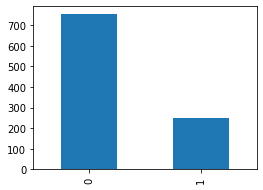

In [5]:
#bar plot of target
import matplotlib.pyplot as plt
%matplotlib inline
data['fraud_reported'].value_counts().plot(kind = 'bar', figsize = (4,3))

In [6]:
def levels(df):
    return (pd.DataFrame({'dtype':df.dtypes, 
                         'levels':df.nunique(), 
                         'uni_values':[df[x].unique() for x in df.columns],
                         'null_values':df.isna().sum(),
                         'unique':df.nunique()}))
levels(data)

dtype  levels  \
months_as_customer             int64     391   
age                            int64      46   
policy_number                  int64    1000   
policy_bind_date              object     951   
policy_state                  object       3   
policy_csl                    object       3   
policy_deductable              int64       3   
policy_annual_premium        float64     991   
umbrella_limit                 int64      11   
insured_zip                    int64     995   
insured_sex                   object       2   
insured_education_level       object       7   
insured_occupation            object      14   
insured_hobbies               object      20   
insured_relationship          object       6   
capital-gains                  int64     338   
capital-loss                   int64     354   
incident_date                 object      60   
incident_type                 object       4   
collision_type                object       4   
incident_severity             object       4   
authorities_contacted         object       5   
incident_state                object       7   
incident_city                 object       7   
incident_location             object    1000   
incident_hour_of_the_day       int64      24   
number_of_vehicles_involved    int64       4   
property_damage               object       3   
bodily_injuries                int64       3   
witnesses                      int64       4   
police_report_available       object       3   
total_claim_amount             int64     763   
injury_claim                   int64     638   
property_claim                 int64     626   
vehicle_claim                  int64     726   
auto_make                     object      14   
auto_model                    object      39   
auto_year                      int64      21   
fraud_reported                 int64       2   
_c39                         float64       0   

                                                                    uni_values  \
months_as_customer           [328, 228, 134, 256, 137, 165, 27, 212, 235, 4...   
age                          [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...   
policy_number                [521585, 342868, 687698, 227811, 367455, 10459...   
policy_bind_date             [2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...   
policy_state                                                      [OH, IN, IL]   
policy_csl                                        [250/500, 100/300, 500/1000]   
policy_deductable                                            [1000, 2000, 500]   
policy_annual_premium        [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...   
umbrella_limit               [0, 5000000, 6000000, 4000000, 3000000, 800000...   
insured_zip                  [466132, 468176, 430632, 608117, 610706, 47845...   
insured_sex                                                     [MALE, FEMALE]   
insured_education_level      [MD, PhD, Associate, Masters, High School, Col...   
insured_occupation           [craft-repair, machine-op-inspct, sales, armed...   
insured_hobbies              [sleeping, reading, board-games, bungie-jumpin...   
insured_relationship         [husband, other-relative, own-child, unmarried...   
capital-gains                [53300, 0, 35100, 48900, 66000, 38400, 52800, ...   
capital-loss                 [0, -62400, -46000, -77000, -39300, -51000, -3...   
incident_date                [2015-01-25, 2015-01-21, 2015-02-22, 2015-01-1...   
incident_type                [Single Vehicle Collision, Vehicle Theft, Mult...   
collision_type               [Side Collision, ?, Rear Collision, Front Coll...   
incident_severity            [Major Damage, Minor Damage, Total Loss, Trivi...   
authorities_contacted                   [Police, None, Fire, Other, Ambulance]   
incident_state                                    [SC, VA, NY, OH, WV, NC, PA]   
incident_city                [Columbus, Riverwood, Arlington, Springfield, ...   
incident_loc

In [7]:
data.drop('_c39',axis=1,inplace=True)

In [8]:
data.replace('?','oth',inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

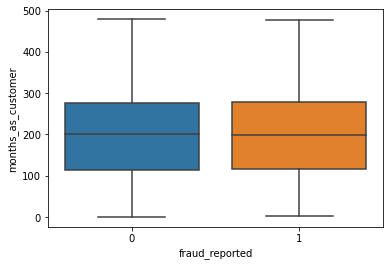

In [9]:
import seaborn as sns

sns.boxplot(data.fraud_reported,data.months_as_customer,orient='v')

In [10]:
data.groupby('fraud_reported').agg({'months_as_customer':'std'})

months_as_customer
fraud_reported                    
0                       113.574565
1                       119.824064

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/App

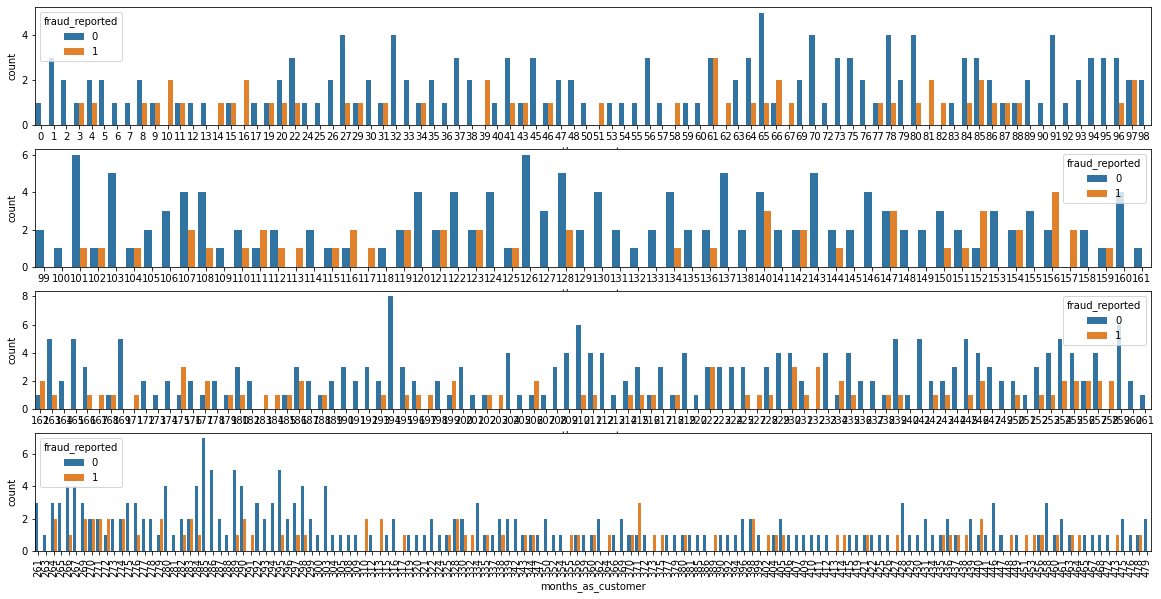

In [11]:
df = data.sort_values('months_as_customer').reset_index(drop=True)
fig_dims = (20, 10)
fig, ax =plt.subplots(4,1,figsize=fig_dims)
sns.countplot(df.months_as_customer.loc[0:199],orient='v',hue=df['fraud_reported'], ax=ax[0])
sns.countplot(df.months_as_customer.loc[200:399],orient='v',hue=df['fraud_reported'], ax=ax[1])
sns.countplot(df.months_as_customer.loc[400:699],orient='v',hue=df['fraud_reported'], ax=ax[2])
sns.countplot(df.months_as_customer.loc[700:],orient='v',hue=df['fraud_reported'], ax=ax[3])
plt.xticks(rotation=90)
fig.show()

In [12]:
data['months_as_customer'].max()

479

In [13]:
bins = [-1, 60, 120, 180, 240, 300, 360, 420, 480]
data['year_bin'] = pd.cut(data['months_as_customer'], bins)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_bin', ylabel='count'>

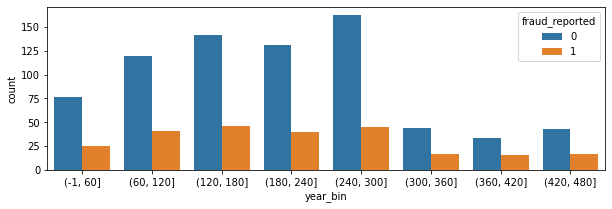

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(data.year_bin,orient='v',hue=data['fraud_reported'])

In [15]:
data.drop('months_as_customer',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_number'>

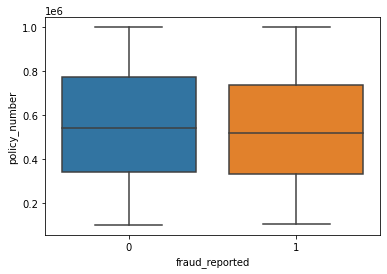

In [16]:
sns.boxplot(data.fraud_reported,data.policy_number,orient='v')

In [17]:
data.groupby('fraud_reported').agg({'policy_number':'std'})

policy_number
fraud_reported               
0               257323.903505
1               256334.029066

In [18]:
data.drop('policy_number',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_state', ylabel='count'>

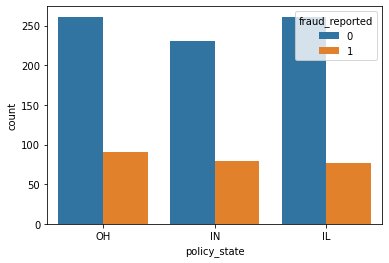

In [19]:
sns.countplot(data.policy_state,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

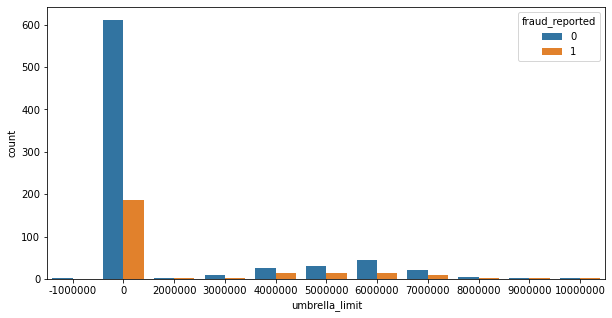

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data.umbrella_limit,orient='v',hue=data['fraud_reported'])

In [21]:
data[['incident_city','incident_location','fraud_reported']].head(10)

incident_city   incident_location  fraud_reported
0      Columbus      9935 4th Drive               1
1     Riverwood        6608 MLK Hwy               1
2      Columbus   7121 Francis Lane               0
3     Arlington    6956 Maple Drive               1
4     Arlington        3041 3rd Ave               0
5     Arlington  8973 Washington St               1
6   Springfield   5846 Weaver Drive               0
7      Columbus        3525 3rd Hwy               0
8     Arlington     4872 Rock Ridge               0
9     Hillsdale    3066 Francis Ave               0

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_city', ylabel='count'>

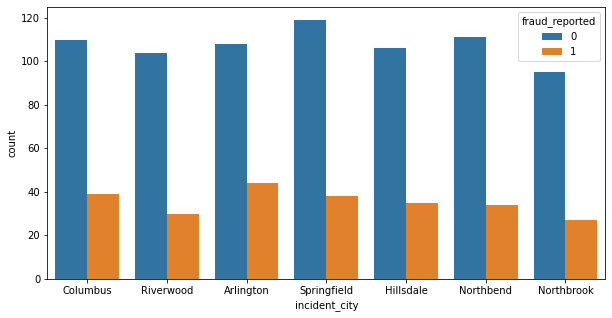

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data.incident_city,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_state', ylabel='count'>

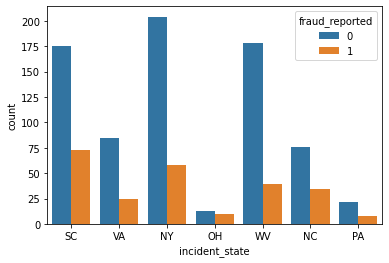

In [23]:
sns.countplot(data.incident_state,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_type', ylabel='count'>

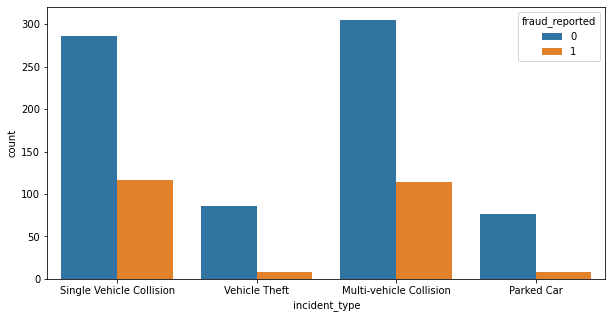

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data.incident_type,orient='v',hue=data['fraud_reported'])

In [25]:
data['pin']= data["incident_location"].str.slice(0,4,1)

In [26]:
data.drop('incident_location',axis=1,inplace=True)

In [27]:
data['pin']

0      9935
1      6608
2      7121
3      6956
4      3041
       ... 
995    6045
996    3092
997    7629
998    6128
999    1416
Name: pin, Length: 1000, dtype: object

In [28]:
data.pin.nunique()

939

In [29]:
df = data[['pin','fraud_reported']][data['pin'].isin(data['pin'].value_counts()[data['pin'].value_counts()>1].index)]

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin', ylabel='count'>

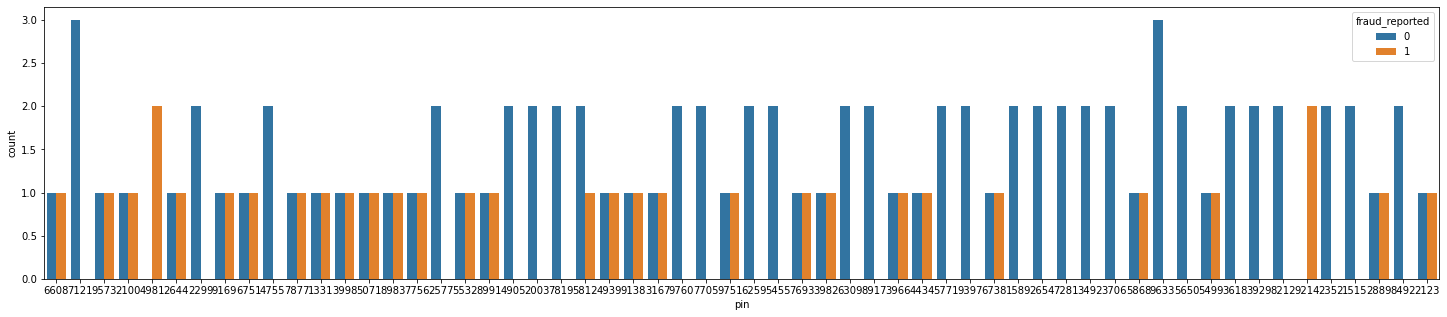

In [30]:
plt.figure(figsize=(25,5))
sns.countplot(df.pin,orient='v',hue=df['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin', ylabel='count'>

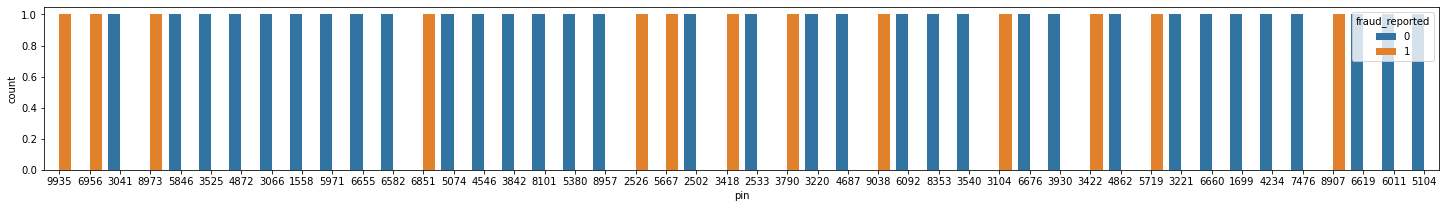

In [31]:
df = data[['pin','fraud_reported']][data['pin'].isin(data['pin'].value_counts()[data['pin'].value_counts()==1].index)]
plt.figure(figsize=(25,3))
sns.countplot(df.pin.loc[:50],orient='v',hue=df['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin', ylabel='count'>

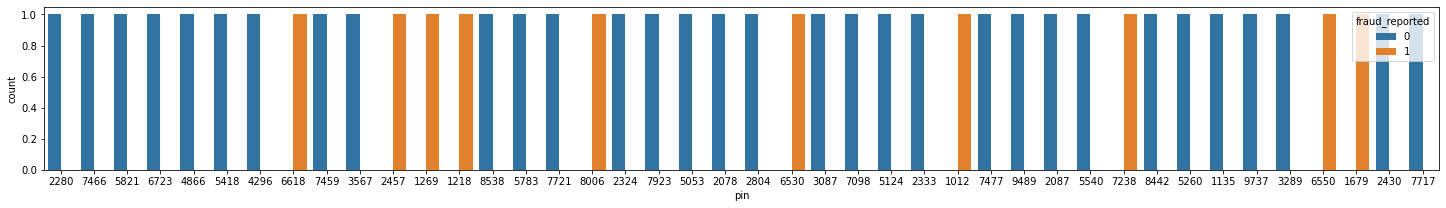

In [32]:
plt.figure(figsize=(25,3))
sns.countplot(df.pin.loc[51:100],orient='v',hue=df['fraud_reported'])

In [33]:
data['pin'].max()

'9988'

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='pin'>

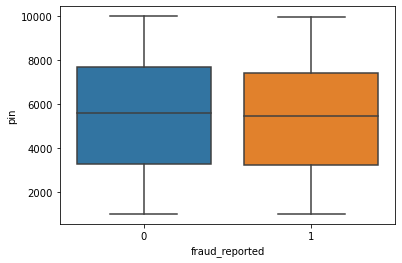

In [34]:
sns.boxplot(data.fraud_reported,data.pin.astype('int'),orient='v')

In [35]:
bins = [0,2000,4000,6000,8000,10000]
data['pin_bin'] = pd.cut(data['pin'].astype('int'), bins)
data.drop('pin',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin_bin', ylabel='count'>

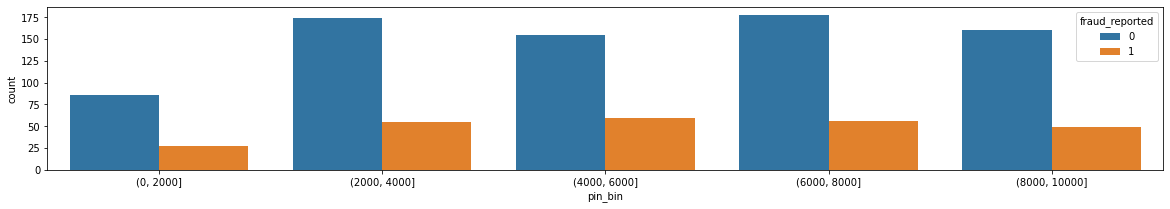

In [36]:
plt.figure(figsize=(20,3))
sns.countplot(data.pin_bin,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

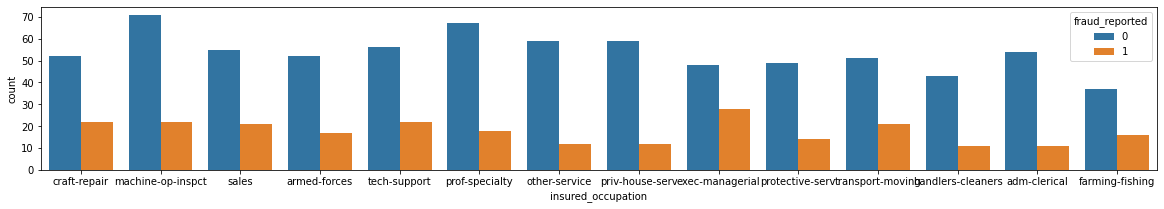

In [37]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_occupation,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

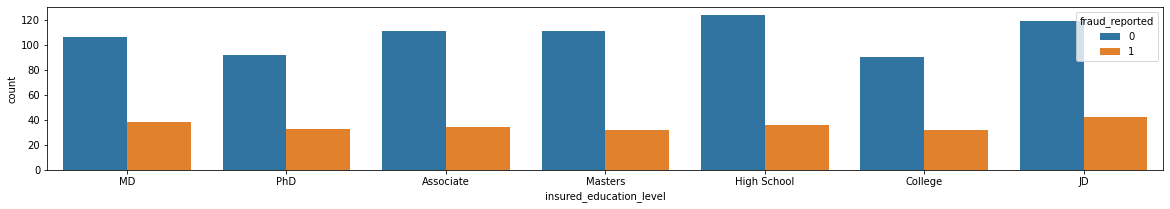

In [38]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_education_level,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

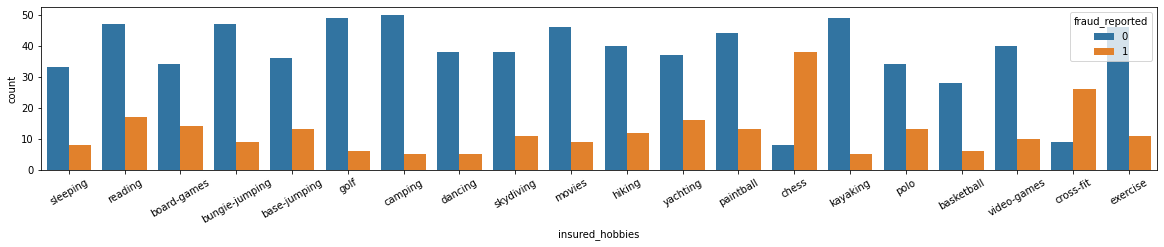

In [39]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_hobbies,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=30)

Looks like people having hobbies like playing Chess or Cross-fit have numerous frauds.

In [40]:
df = data.groupby('insured_hobbies')['fraud_reported'].value_counts().unstack().reset_index()
df['ratio_1/0'] = df[1]/df[0]
df

fraud_reported insured_hobbies   0   1  ratio_1/0
0                 base-jumping  36  13   0.361111
1                   basketball  28   6   0.214286
2                  board-games  34  14   0.411765
3               bungie-jumping  47   9   0.191489
4                      camping  50   5   0.100000
5                        chess   8  38   4.750000
6                    cross-fit   9  26   2.888889
7                      dancing  38   5   0.131579
8                     exercise  46  11   0.239130
9                         golf  49   6   0.122449
10                      hiking  40  12   0.300000
11                    kayaking  49   5   0.102041
12                      movies  46   9   0.195652
13                   paintball  44  13   0.295455
14                        polo  34  13   0.382353
15                     reading  47  17   0.361702
16                   skydiving  38  11   0.289474
17                    sleeping  33   8   0.242424
18                 video-games  40  10   0.250000
19                    yachting  37  16   0.432432

In [41]:
df.sort_values('ratio_1/0')

fraud_reported insured_hobbies   0   1  ratio_1/0
4                      camping  50   5   0.100000
11                    kayaking  49   5   0.102041
9                         golf  49   6   0.122449
7                      dancing  38   5   0.131579
3               bungie-jumping  47   9   0.191489
12                      movies  46   9   0.195652
1                   basketball  28   6   0.214286
8                     exercise  46  11   0.239130
17                    sleeping  33   8   0.242424
18                 video-games  40  10   0.250000
16                   skydiving  38  11   0.289474
13                   paintball  44  13   0.295455
10                      hiking  40  12   0.300000
0                 base-jumping  36  13   0.361111
15                     reading  47  17   0.361702
14                        polo  34  13   0.382353
2                  board-games  34  14   0.411765
19                    yachting  37  16   0.432432
6                    cross-fit   9  26   2.888889
5                        chess   8  38   4.750000

In [42]:
data = data.merge(df[['insured_hobbies','ratio_1/0']], on = 'insured_hobbies', how='left')

In [43]:
data['insured_hobbies'][data['ratio_1/0']<=0.15] = 'h1'
data['insured_hobbies'][(data['ratio_1/0']>0.15)&(data['ratio_1/0']<=0.25)] = 'h2'
data['insured_hobbies'][(data['ratio_1/0']>0.25)&(data['ratio_1/0']<=0.35)] = 'h3'
data['insured_hobbies'][(data['ratio_1/0']>0.35)&(data['ratio_1/0']<=0.45)] = 'h4'
data['insured_hobbies'][(data['ratio_1/0']>0.45)&(data['ratio_1/0']<=3)] = 'h5'
data['insured_hobbies'][(data['ratio_1/0']>3)] = 'h6'

/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/67547089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['insured_hobbies'][data['ratio_1/0']<=0.15] = 'h1'
/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/67547089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['insured_hobbies'][(data['ratio_1/0']>0.15)&(data['ratio_1/0']<=0.25)] = 'h2'
/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/67547089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'h2'),
  Text(1, 0, 'h4'),
  Text(2, 0, 'h1'),
  Text(3, 0, 'h3'),
  Text(4, 0, 'h6'),
  Text(5, 0, 'h5')])

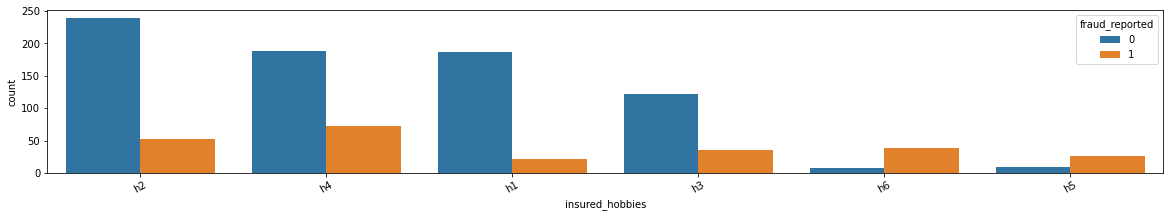

In [44]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_hobbies,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=30)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

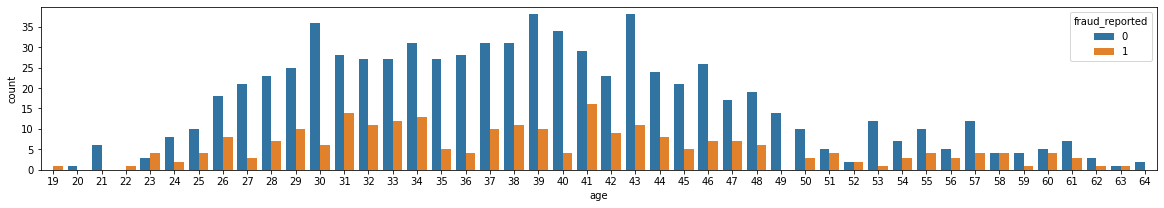

In [45]:
plt.figure(figsize=(20,3))
sns.countplot(data.age,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

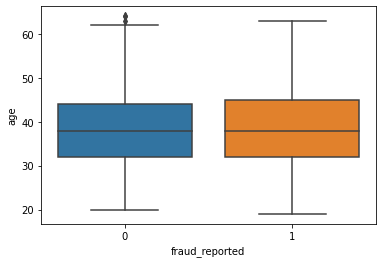

In [46]:
sns.boxplot(data.fraud_reported,data.age,orient='v')

In [47]:
bins = [18, 22, 35, 50, 65]
data['age_bin'] = pd.cut(data['age'], bins)

In [48]:
data.drop('age',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bin', ylabel='count'>

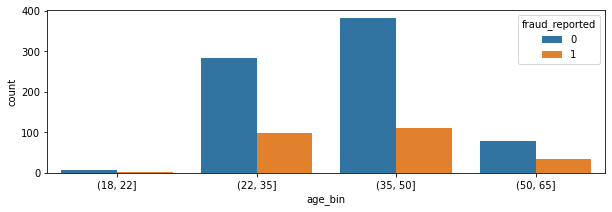

In [49]:
plt.figure(figsize=(10,3))
sns.countplot(data.age_bin,orient='v',hue=data['fraud_reported'])

In [50]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [51]:
data['policy_age'] = data['incident_date'] - data['policy_bind_date']
data['policy_age'] = data['policy_age'].astype('str')
data['policy_age'] = data['policy_age'].str.slice(0,-5,1)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_age'>

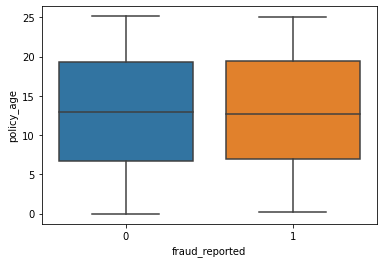

In [52]:
sns.boxplot(data.fraud_reported,data.policy_age.astype('int')/365,orient='v')

In [53]:
data['policy_age'].astype('int').max()/365

25.12876712328767

In [54]:
bins = [-1, 5, 10, 15, 20, 26]
data['policy_age_bin'] = pd.cut(data['policy_age'].astype('int')/365, bins)
data.drop('policy_age',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_age_bin', ylabel='count'>

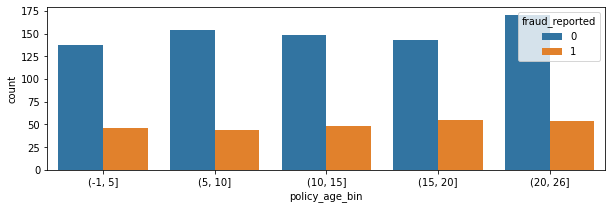

In [55]:
plt.figure(figsize=(10,3))
sns.countplot(data.policy_age_bin,orient='v',hue=data['fraud_reported'])

In [56]:
data['age_at_incident'] = data['incident_date'].astype('str').str.slice(0,4,1).astype('int') - data['auto_year']

In [57]:
data.drop(['policy_bind_date','incident_date','auto_year'],axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_at_incident', ylabel='count'>

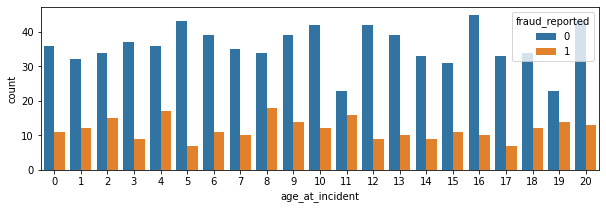

In [58]:
plt.figure(figsize=(10,3))
sns.countplot(data.age_at_incident,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

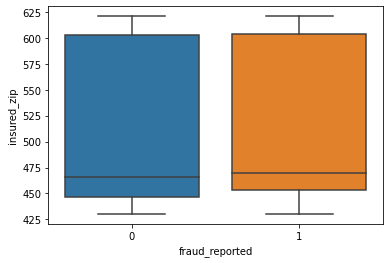

In [59]:
sns.boxplot(data.fraud_reported,data.insured_zip/1000,orient='v')

In [60]:
bins = [42.5, 45, 50, 65]
data['insured_zip_bin'] = pd.cut(data['insured_zip']/10000, bins)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_zip_bin', ylabel='count'>

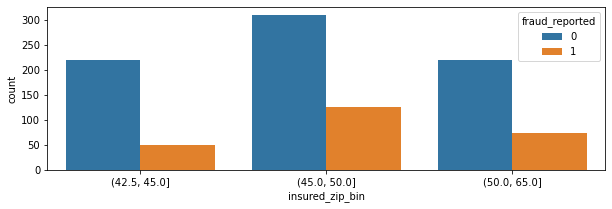

In [61]:
plt.figure(figsize=(10,3))
sns.countplot(data.insured_zip_bin,orient='v',hue=data['fraud_reported'])

In [62]:
data.drop('insured_zip',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

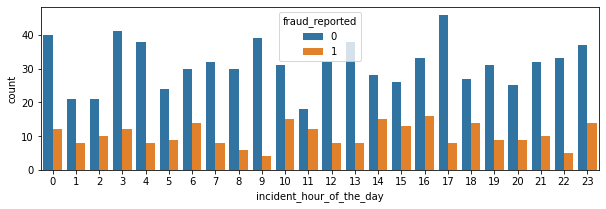

In [63]:
plt.figure(figsize=(10,3))
sns.countplot(data.incident_hour_of_the_day,orient='v',hue=data['fraud_reported'])

In [64]:
data['incident_hour_of_the_day'][data['incident_hour_of_the_day']==0]=24
bins = [0, 6, 9, 13, 17, 25]
data['incident_hour_bin'] = pd.cut(data['incident_hour_of_the_day'], bins)
data.drop('incident_hour_of_the_day',axis=1,inplace=True)

/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/2119761228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['incident_hour_of_the_day'][data['incident_hour_of_the_day']==0]=24


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_hour_bin', ylabel='count'>

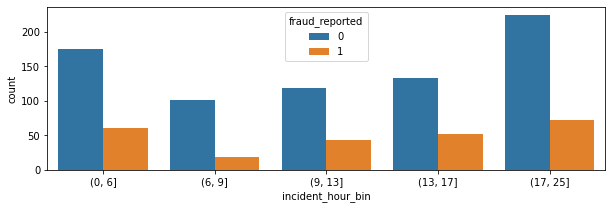

In [65]:
plt.figure(figsize=(10,3))
sns.countplot(data.incident_hour_bin,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='auto_make', ylabel='count'>

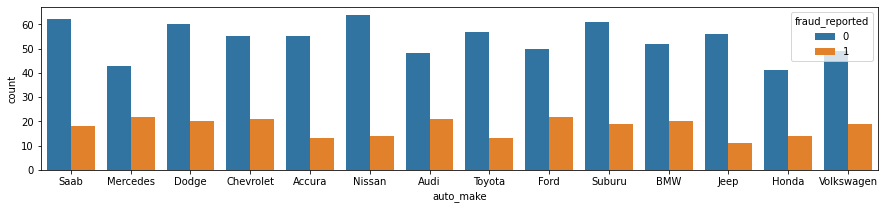

In [66]:
plt.figure(figsize=(15,3))
sns.countplot(data.auto_make,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

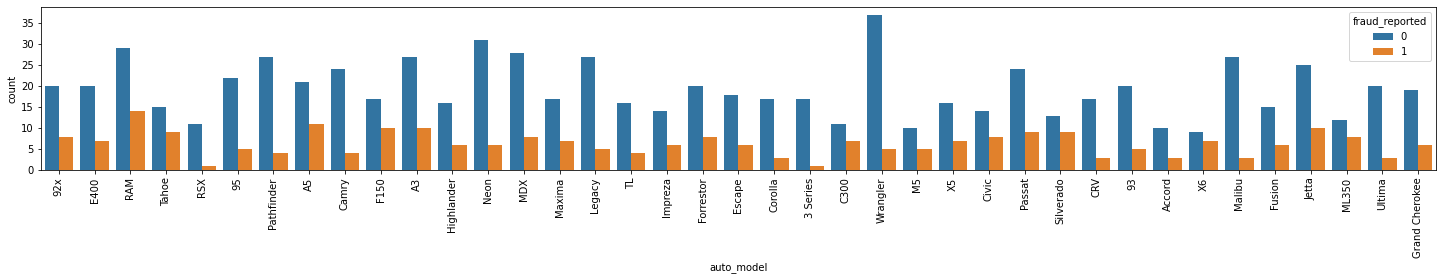

In [67]:
plt.figure(figsize=(25,3))
sns.countplot(data.auto_model,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=90)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Saab_92x'),
  Text(1, 0, 'Mercedes_E400'),
  Text(2, 0, 'Dodge_RAM'),
  Text(3, 0, 'Chevrolet_Tahoe'),
  Text(4, 0, 'Accura_RSX'),
  Text(5, 0, 'Saab_95'),
  Text(6, 0, 'Nissan_Pathfinder'),
  Text(7, 0, 'Audi_A5'),
  Text(8, 0, 'Toyota_Camry'),
  Text(9, 0, 'Ford_F150'),
  Text(10, 0, 'Audi_A3'),
  Text(11, 0, 'Toyota_Highlander'),
  Text(12, 0, 'Dodge_Neon'),
  Text(13, 0, 'Accura_MDX'),
  Text(14, 0, 'Nissan_Maxima'),
  Text(15, 0, 'Suburu_Legacy'),
  Text(16, 0, 'Accura_TL'),
  Text(17, 0, 'Suburu_Impreza'),
  Text(18, 0, 'Suburu_Forrestor'),
  Text(19, 0, 'Ford_Escape'),
  Text(20, 0, 'Toyota_Corolla'),
  Text(21, 0, 'BMW_3 Series'),
  Text(22, 0, 'Mercedes_C300'),
  Text(23, 0, 'Jeep_Wrangler'),
  Text(24, 0, 'BMW_M5'),
  Text(25, 0, 'BMW_X5'),
  Text(26, 0, 'Honda_Civic'),
  Text(27, 0,

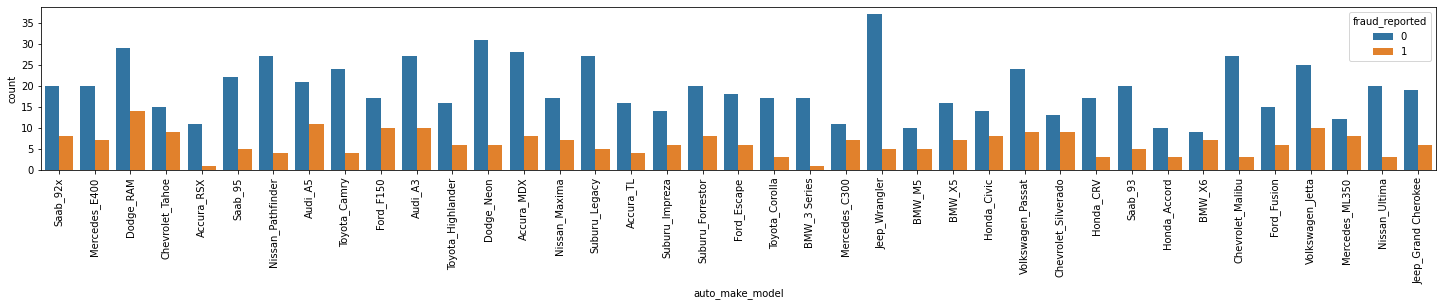

In [68]:
data['auto_make_model']=data['auto_make']+'_'+data['auto_model']
plt.figure(figsize=(25,3))
sns.countplot(data.auto_make_model,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=90)

In [69]:
data.drop(['auto_make','auto_model'],axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

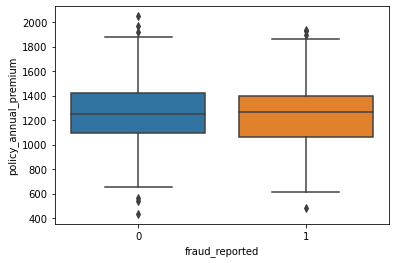

In [70]:
sns.boxplot(data.fraud_reported,data.policy_annual_premium,orient='v')

In [71]:
bins = [0, 500, 1000, 1500, 2500]
data['premium_bin'] = pd.cut(data['policy_annual_premium'], bins)
data.drop('policy_annual_premium',axis=1,inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='premium_bin', ylabel='count'>

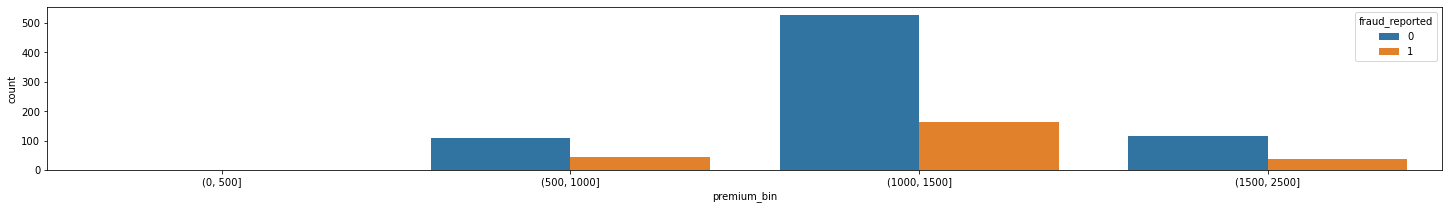

In [72]:
plt.figure(figsize=(25,3))
sns.countplot(data.premium_bin,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

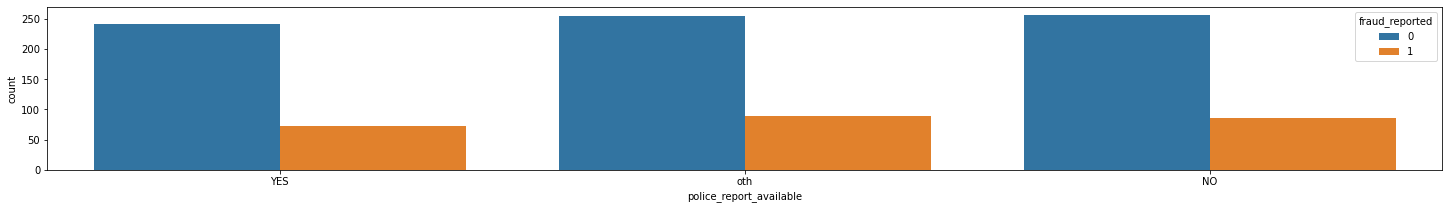

In [73]:
plt.figure(figsize=(25,3))
sns.countplot(data.police_report_available,orient='v',hue=data['fraud_reported'])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='witnesses', ylabel='count'>

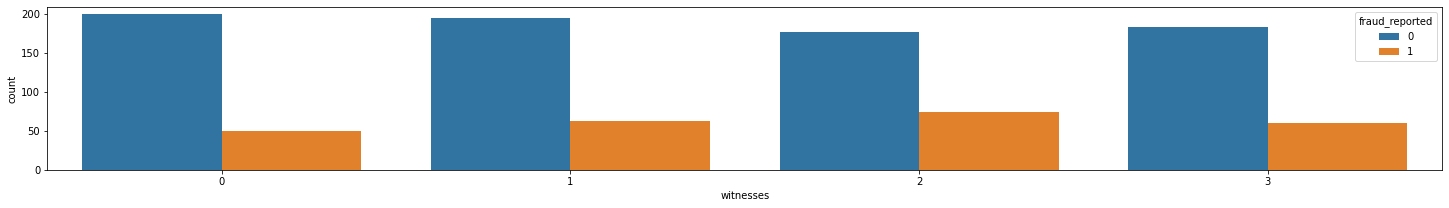

In [74]:
plt.figure(figsize=(25,3))
sns.countplot(data.witnesses,orient='v',hue=data['fraud_reported'])

/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/1686450760.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

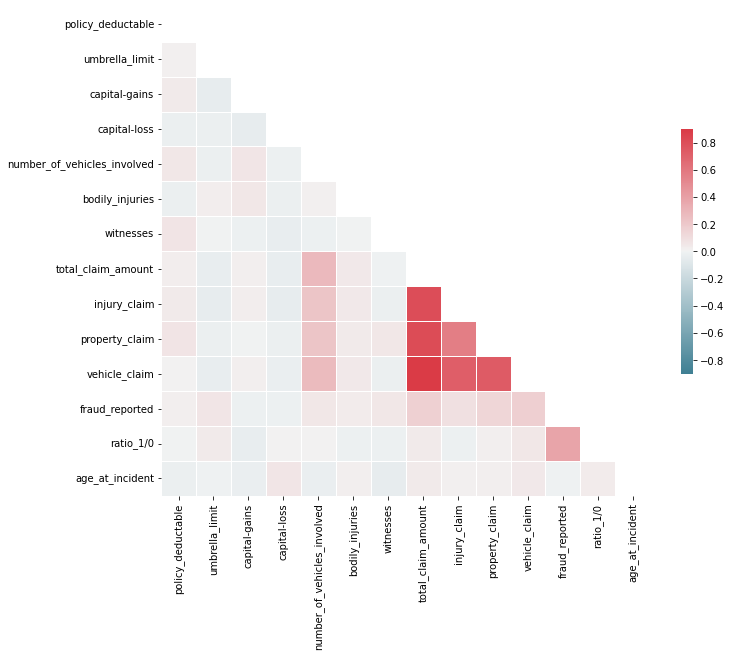

In [75]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, vmin=-.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
#total_claim_amount is caused by summation of injury_claim, property_claim, vehicle_claim. As it does occur before, we shall drop.
data.drop('total_claim_amount',axis=1,inplace=True)

In [77]:
data.columns

Index(['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'year_bin',
       'pin_bin', 'ratio_1/0', 'age_bin', 'policy_age_bin', 'age_at_incident',
       'insured_zip_bin', 'incident_hour_bin', 'auto_make_model',
       'premium_bin'],
      dtype='object')

In [78]:
x = data.copy().drop("fraud_reported",axis=1)
y = data["fraud_reported"]

In [79]:
num_cols = ['capital-gains','capital-loss','injury_claim', 'property_claim', 'vehicle_claim','ratio_1/0']
cat_cols = x.columns.difference(num_cols)


In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 200)

In [81]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 35), (200, 35), (800,), (200,))

In [82]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train[num_cols])
x_train[num_cols] = scale.transform(x_train[num_cols])
x_test[num_cols] = scale.transform(x_test[num_cols])

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [83]:
from sklearn.preprocessing import LabelEncoder
cols = ['umbrella_limit','insured_occupation','age_at_incident','auto_make_model']
import bisect
for col in cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = x_test[col].map(lambda s: 'other' if s not in le.classes_ else s)
    le_classes = le.classes_.tolist()
    #bisect.insort_left(le_classes, 'other')
    le.classes_ = le_classes
    x_test[col] = le.transform(x_test[col])

/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/275781625.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = le.fit_transform(x_train[col])
/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/275781625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = x_test[col].map(lambda s: 'other' if s not in le.classes_ else s)
/var/folders/fl/qgwf137d5l97t9s7y11tnpzw0000gn/T/ipykernel_3073/275781625.py:11: SettingWithCopyWarning: 
A value is trying to be set 

In [84]:
cat_cols = x_train[cat_cols].columns.difference(cols)
cat_cols

Index(['age_bin', 'authorities_contacted', 'bodily_injuries', 'collision_type',
       'incident_city', 'incident_hour_bin', 'incident_severity',
       'incident_state', 'incident_type', 'insured_education_level',
       'insured_hobbies', 'insured_relationship', 'insured_sex',
       'insured_zip_bin', 'number_of_vehicles_involved', 'pin_bin',
       'police_report_available', 'policy_age_bin', 'policy_csl',
       'policy_deductable', 'policy_state', 'premium_bin', 'property_damage',
       'witnesses', 'year_bin'],
      dtype='object')

In [85]:
x_train = pd.get_dummies(x_train,columns=cat_cols,drop_first=False,)
x_test = pd.get_dummies(x_test,columns=cat_cols,drop_first=False,)


In [86]:
x_train.columns.difference(x_test.columns)

Index([], dtype='object')

In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 122), (200, 122), (800,), (200,))

In [88]:
x_train.describe()

umbrella_limit  insured_occupation  capital-gains  capital-loss  \
count      800.000000          800.000000   8.000000e+02  8.000000e+02   
mean         1.860000            6.620000   1.920686e-16  1.637579e-17   
std          1.874778            4.011635   1.000626e+00  1.000626e+00   
min          0.000000            0.000000  -9.081496e-01 -2.981733e+00   
25%          1.000000            3.000000  -9.081496e-01 -8.587416e-01   
50%          1.000000            7.000000  -9.081496e-01 -1.256392e-02   
75%          1.000000           10.000000   9.228227e-01  9.641364e-01   
max         10.000000           13.000000   2.719504e+00  9.641364e-01   

       injury_claim  property_claim  vehicle_claim     ratio_1/0  \
count  8.000000e+02    8.000000e+02   8.000000e+02  8.000000e+02   
mean  -3.066991e-17    4.191092e-17   1.785724e-16 -8.961581e-17   
std    1.000626e+00    1.000626e+00   1.000626e+00  1.000626e+00   
min   -1.515876e+00   -1.543657e+00  -2.016039e+00 -4.420274e-01   
25%   -6.227151e-01   -6.127830e-01  -3.991040e-01 -3.526958e-01   
50%   -1.429514e-01   -1.375312e-01   2.126985e-01 -2.570224e-01   
75%    7.871925e-01    7.220547e-01   6.878231e-01 -1.864975e-01   
max    2.830875e+00    3.347304e+00   2.199101e+00  4.098303e+00   

       age_at_incident  auto_make_model  age_bin_(18, 22]  age_bin_(22, 35]  \
count        800.00000       800.000000        800.000000        800.000000   
mean           9.88125        19.440000          0.011250          0.396250   
std            5.99851        11.451652          0.105534          0.489423   
min            0.00000         0.000000          0.000000          0.000000   
25%            5.00000        10.000000          0.000000          0.000000   
50%           10.00000        20.000000          0.000000          0.000000   
75%           15.00000        29.250000          0.000000          1.000000   
max           20.00000        38.000000          1.000000          1.000000   

       age_bin_(35, 50]  age_bin_(50, 65]  authorities_contacted_Ambulance  \
count        800.000000         800.00000                       800.000000   
mean           0.486250           0.10625                         0.188750   
std            0.500124           0.30835                         0.391555   
min            0.000000           0.00000                         0.000000   
25%            0.000000           0.00000                         0.000000   
50%            0.000000           0.00000                         0.000000   
75%            1.000000           0.00000                         0.000000   
max            1.000000           1.00000                         1.000000   

       authorities_contacted_Fire  authorities_contacted_None  \
count                  800.000000                  800.000000   
mean                     0.222500                    0.087500   
std                      0.416185                    0.282743   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       authorities_contacted_Other  authorities_contacted_Police  \
count                   800.000000                    800.000000   
mean                      0.205000                      0.296250   
std                       0.403954                      0.456888   
min                       0.000000                      0.000000   
25%                       0.000000                      0.000000   
50%                       0.000000                      0.000000   
75%                       0.000000                      1.000000   
max                       1.000000                      1.000000   

       bodily_injuries_0  bodily_injuries_1  bodily_injuries_2  \
count         800.000000         800.000000    

In [89]:
x_test.columns.difference(x_train.columns)

Index([], dtype='object')

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=200,max_iter=2000)
lr.fit(x_train,y_train)
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
cm = confusion_matrix(y_test, test_pred_lr)
print("Accuracy on train is:",accuracy_score(y_train,train_pred_lr))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_lr))

Accuracy on train is: 0.8725
Accuracy on test is: 0.88


===============Classification report for test===============
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       149
           1       0.78      0.75      0.76        51

    accuracy                           0.88       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.88      0.88      0.88       200



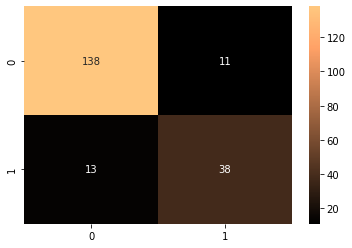

In [92]:
from sklearn.metrics import classification_report
# making a classification report
print("===============Classification report for test===============")
cr = classification_report(y_test,  test_pred_lr)
print(cr)

# making a confusion matrix LR test
cm = confusion_matrix(y_test, test_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

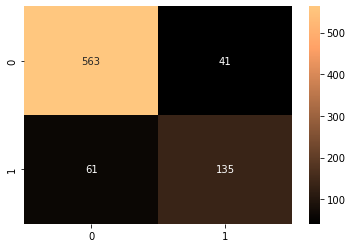

In [93]:
# making a confusion matrix LR train
cm = confusion_matrix(y_train, train_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

In [94]:
print("===============Classification report for train===============")
#cr = classification_report(y_train,  train_pred_lr)
#print(cr)

# making a confusion matrix
#cm = confusion_matrix(y_train, train_pred_lr)
#sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
#plt.show()

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
train_pred_knn = knn.predict(x_train)
test_pred_knn = knn.predict(x_test)

===============Classification report for train===============


In [95]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_knn))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_knn))

Accuracy on train is: 0.755
Accuracy on test is: 0.745


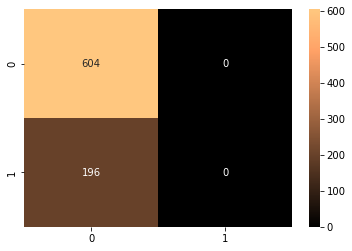

In [96]:
# making a confusion matrix knn  train 
cm = confusion_matrix(y_train, train_pred_knn)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

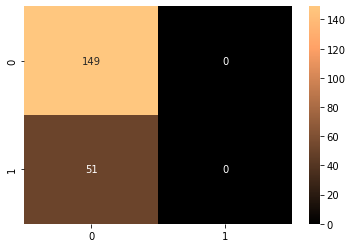

In [97]:
# making a confusion matrix knn  test 
cm = confusion_matrix(y_test, test_pred_knn)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc
dtc.fit(x_train, y_train)
train_pred_dtc = dtc.predict(x_train)
test_pred_dtc = dtc.predict(x_test)

In [99]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_dtc))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_dtc))

Accuracy on train is: 1.0
Accuracy on test is: 0.765


In [100]:
dtc

DecisionTreeClassifier()

In [101]:
confusion_matrix(y_test, test_pred_dtc)

array([[128,  21],
       [ 26,  25]])

In [102]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':range(2,20,3)}
dt_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,n_jobs=-1,cv=10)
dt_grid.fit(x_train,y_train)
print(dt_grid.best_score_)
print(dt_grid.best_params_)
train_pred_dt_grid = dt_grid.predict(x_train)
test_pred_dt_grid = dt_grid.predict(x_test)

0.8324999999999999
{'max_depth': 2}


In [103]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_dt_grid))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_dt_grid))

Accuracy on train is: 0.85375
Accuracy on test is: 0.825


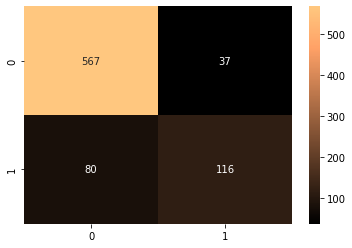

In [104]:
# making a confusion matrix for  DT train data
cm = confusion_matrix(y_train, train_pred_dt_grid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

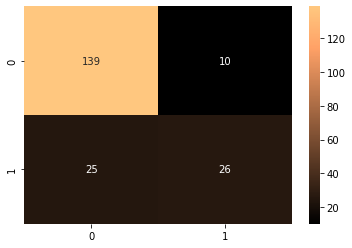

In [105]:
# making a confusion matrix for  DT train data
cm = confusion_matrix(y_test, test_pred_dt_grid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

In [106]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc

parameters={'n_estimators':[100,300],
           'max_features':range(10,71,20),
           'max_depth':[2, 5,9,13],
           'bootstrap':[True,False]}
rf = GridSearchCV(rfc,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
rf.fit(x_train,y_train)

CPU times: user 2.14 s, sys: 242 ms, total: 2.39 s
Wall time: 2min 36s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5, 9, 13],
                         'max_features': range(10, 71, 20),
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [107]:
rf.best_params_

{'bootstrap': True, 'max_depth': 2, 'max_features': 70, 'n_estimators': 300}

In [108]:
rfgrid = rf.best_estimator_
rfgrid.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features=70, n_estimators=300)

In [109]:
train_pred_rfgrid = rfgrid.predict(x_train)
test_pred_rfgrid = rfgrid.predict(x_test)

In [110]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_rfgrid))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_rfgrid))

Accuracy on train is: 0.87625
Accuracy on test is: 0.88


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       149
           1       0.75      0.80      0.77        51

    accuracy                           0.88       200
   macro avg       0.84      0.85      0.85       200
weighted avg       0.88      0.88      0.88       200



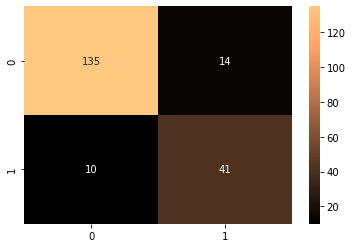

In [111]:
# making a classification report
cr = classification_report(y_test,  test_pred_rfgrid)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, test_pred_rfgrid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       604
           1       0.72      0.81      0.76       196

    accuracy                           0.88       800
   macro avg       0.83      0.85      0.84       800
weighted avg       0.88      0.88      0.88       800



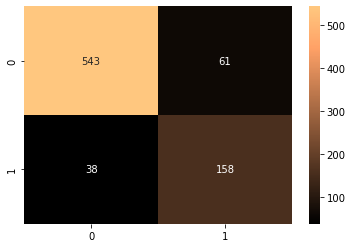

In [112]:
cr = classification_report(y_train,  train_pred_rfgrid)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_train, train_pred_rfgrid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

In [113]:
x_train.head()

umbrella_limit  insured_occupation  capital-gains  capital-loss  \
989               1                   3       0.445452     -0.953748   
835               7                   7      -0.908150     -0.925335   
678               1                   6       0.698125     -1.216569   
177               1                   9      -0.908150     -0.637652   
410               1                   0      -0.908150     -0.825889   

     injury_claim  property_claim  vehicle_claim  ratio_1/0  age_at_incident  \
989     -0.316213       -1.543657       0.491622  -0.348631                0   
835     -1.333495       -1.171720      -1.685679  -0.330437                0   
678      1.292794       -0.111702       0.552604  -0.186497                5   
177      0.790232        0.807807       0.092327  -0.440035               12   
410     -1.252437       -1.409346      -1.812945  -0.166334                9   

     auto_make_model  age_bin_(18, 22]  age_bin_(22, 35]  age_bin_(35, 50]  \
989                9                 1                 0                 0   
835               24                 0                 0                 0   
678               14                 0                 0                 1   
177               37                 0                 0                 1   
410                6                 0                 0                 1   

     age_bin_(50, 65]  authorities_contacted_Ambulance  \
989                 0                                0   
835                 1                                0   
678                 0                                0   
177                 0                                0   
410                 0                                0   

     authorities_contacted_Fire  authorities_contacted_None  \
989                           0                           0   
835                           0                           1   
678                           1                           0   
177                           1                           0   
410                           0                           1   

     authorities_contacted_Other  authorities_contacted_Police  \
989                            0                             1   
835                            0                             0   
678                            0                             0   
177                            0                             0   
410                            0                             0   

     bodily_injuries_0  bodily_injuries_1  bodily_injuries_2  \
989                  0                  1                  0   
835                  1                  0                  0   
678                  1                  0                  0   
177                  1                  0                  0   
410                  1                  0                  0   

     collision_type_Front Collision  collision_type_Rear Collision  \
989                               0                              1   
835                               0                              0   
678                               1                              0   
177                               0                              1   
410                               0                              0   

     collision_type_Side Collision  collision_type_oth  \
989                              0                   0   
835                              0                   1   
678                              0                   0   
177                              0                   0   
410                              0                   1   

     incident_city_Arlington  incident_city_Columbus  incident_city_Hillsdale  \
989                        1                       0                        0   
835                        0                       0                        0   
678                        0                       1                        0   
177               

In [114]:
import lime
import lime.lime_tabular


In [115]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns, class_names=y.unique(), discretize_continuous=True)

In [116]:
explainer

In [117]:
##Decision tree
exp = explainer.explain_instance(x_test.iloc[80],dt_grid.predict_proba,num_features=12,top_labels=1)


In [118]:
# Show in notebook
exp.show_in_notebook(show_table=True, show_all=False)

In [119]:
#Logistic Regression
exp = explainer.explain_instance(x_test.iloc[8],lr.predict_proba,num_features=12,top_labels=1)


In [120]:
# Show in notebook
exp.show_in_notebook(show_table=True, show_all=False)

In [121]:
#Random forest

exp = explainer.explain_instance(x_test.iloc[80],rfgrid.predict_proba,num_features=12,top_labels=1)


In [122]:
# Show in notebook
exp.show_in_notebook(show_table=True, show_all=False)

In [123]:
##Knn clustering
#Random forest

exp = explainer.explain_instance(x_test.iloc[80],knn.predict_proba,num_features=12,top_labels=1)


In [124]:
# Show in notebook
exp.show_in_notebook(show_table=True, show_all=False)